In [18]:
#LOGISTIC REGRESSION WITh SCIKIT-LEARN  

In [19]:
#DATAET: Affairs, Problem statement: classification of each woman

In [3]:
#import modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\Aeon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#load data
dta = sm.datasets.fair.load_pandas().data

#add affair column: 1, 0 
dta['affair'] = (dta.affairs > 0).astype(int) 

In [6]:
#data explore
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [8]:
#Data visualisation
%matplotlib inline

Text(0,0.5,'Freq')

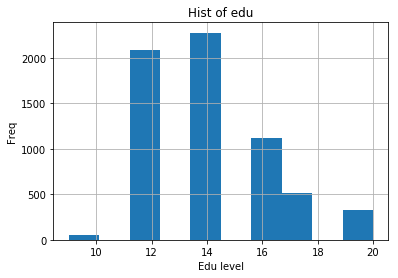

In [9]:
#edu hist
import matplotlib.pyplot as plt
dta.educ.hist()
plt.title('Hist of edu')
plt.xlabel('Edu level')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

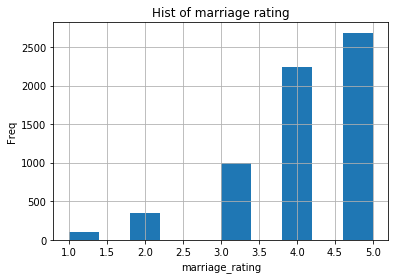

In [10]:
#marriage_rating hist
import matplotlib.pyplot as plt
dta.rate_marriage.hist()
plt.title('Hist of marriage rating')
plt.xlabel('marriage_rating')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

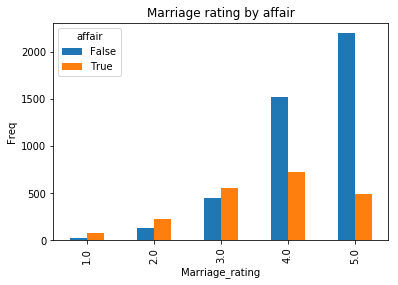

In [11]:
#barplot og marriage rating grouped by affair
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind = 'bar')
plt.title('Marriage rating by affair')
plt.xlabel('Marriage_rating')
plt.ylabel('Freq')

Text(0,0.5,'Freq')

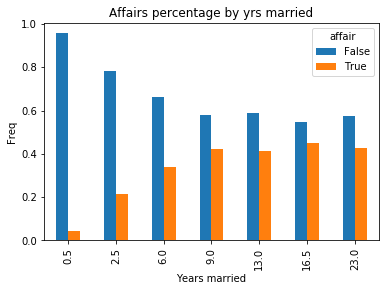

In [12]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis = 0).plot(kind = 'bar') 
plt.title('Affairs percentage by yrs married')
plt.xlabel('Years married')
plt.ylabel('Freq')

In [15]:
#data prep
#create intercept column and dummy var
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type = 'dataframe')
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [16]:
#fixing column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husband)[T.2.0]':'occ_husb_2',
                        'C(occupation_husband)[T.3.0]':'occ_husb_3',
                        'C(occupation_husband)[T.4.0]':'occ_husb_4',
                        'C(occupation_husband)[T.5.0]':'occ_husb_5',
                        'C(occupation_husband)[T.6.0]':'occ_husb_6'})

In [17]:
#flatten y into a 1-D array
y = np.ravel(y)

In [19]:
#LoGISTIC REGRESSION

In [20]:
#initiate a model, fix X and y
model = LogisticRegression()
model = model.fit(X,y)

#check accuracy on the training set
model.score(X,y)

0.7258875274897895

In [21]:
#percentage having affairs
y.mean()

0.3224945020420987

In [22]:
#examine coeff
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6',
        'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
        'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
        'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
        'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983606],
        [ 0.1880664 ],
        [ 0.49894812],
        [ 0.25066814],
        [ 0.839008  ],
        [ 0.83390825],
        [ 0.19063622],
        [ 0.2978329 ],
        [ 0.16140914],
        [ 0.18777109],
        [ 0.19401647],
        [-0.70311973],
        [-0.05841813],
        [ 0.10567669],
        [ 0.01691983],
        [-0.37113512],
        [ 0.00401584]]))

In [23]:
#Model Evaluation

In [25]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model2 = LogisticRegression()
model2 = model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#predict class lables for the test set
predicted = model2.predict(X_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
#Generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.92112636, 0.07887364],
       [0.74190551, 0.25809449],
       [0.76155955, 0.23844045],
       ...,
       [0.78582375, 0.21417625],
       [0.58013642, 0.41986358],
       [0.52538652, 0.47461348]])

In [29]:
#Generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.7188481675392671
0.7535211522782861


In [31]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1140  105]
 [ 432  233]]
             precision    recall  f1-score   support

        0.0       0.73      0.92      0.81      1245
        1.0       0.69      0.35      0.46       665

avg / total       0.71      0.72      0.69      1910



In [32]:
#model evalutaion using CV
#evaluate the model using 10 fold CV
scores = cross_val_score(LogisticRegression(),X,y, scoring = 'accuracy', cv = 10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [33]:
#Predicting the prob of an affair
#25 year old teacher, 3 years of marriage, stringly religious, rates her marriage as fair, husband is a farmer

In [34]:
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.7747227, 0.2252773]])